In [23]:
import pandas as pd

In [24]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv?_sm_au_=iVVb0jDn0PSH4HSMRMpVsKQtC6Vvq"

In [25]:
df = pd.read_csv(url)

In [55]:
df.drop(columns=['Lat', 'Long'], inplace=True)

In [56]:
df.head()

Province/State Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0            NaN       Thailand        2        3        5        7        8   
1            NaN          Japan        2        1        2        2        4   
2            NaN      Singapore        0        1        3        3        4   
3            NaN          Nepal        0        0        0        1        1   
4            NaN       Malaysia        0        0        0        3        4   

   1/27/20  1/28/20  1/29/20  ...  3/2/20  3/3/20  3/4/20  3/5/20  3/6/20  \
0        8       14       14  ...      43      43      43      47      48   
1        4        7        7  ...     274     293     331     360     420   
2        5        7        7  ...     108     110     110     117     130   
3        1        1        1  ...       1       1       1       1       1   
4        4        4        7  ...      29      36      50      50      83   

   3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  
0      50      50      50       53       59  
1     461     502     511      581      639  
2     138     150     150      160      178  
3       1       1       1        1        1  
4      93      99     117      129      149  

[5 rows x 52 columns]

In [92]:
swiss = df[df["Country/Region"] == "Switzerland"].drop(columns=["Country/Region"]).stack().droplevel(level=0)

In [93]:
italy = df[df["Country/Region"] == "Italy"].drop(columns=["Country/Region"]).stack().droplevel(level=0)

In [103]:
france = df[(df["Country/Region"] == "France") & (df["Province/State"] == "France")].drop(columns=["Country/Region", "Province/State"]).stack().droplevel(level=0)

In [104]:
# france.drop(columns=["Country/Region"], inplace=True)

In [105]:
# france = france.stack().droplevel(level=0)

In [106]:
spain = df[df["Country/Region"] == "Spain"].drop(columns=["Country/Region"]).stack().droplevel(level=0)

In [107]:
germany =  df[df["Country/Region"] == "Germany"].drop(columns=["Country/Region"]).stack().droplevel(level=0)

In [108]:
austria =  df[df["Country/Region"] == "Austria"].drop(columns=["Country/Region"]).stack().droplevel(level=0)

In [109]:
df2 = pd.concat([swiss, italy, france, germany, austria, spain], axis=1)

In [110]:
df2.columns = ['Switzerland', 'Italy', 'France', 'Germany', 'Austria', 'Spain']

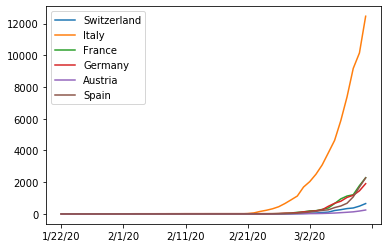

In [112]:
df2.plot()

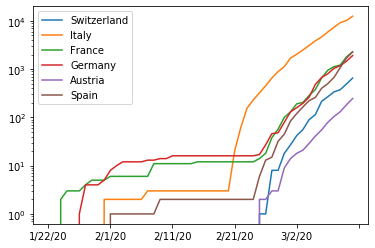

In [113]:
df2.plot(logy=True)

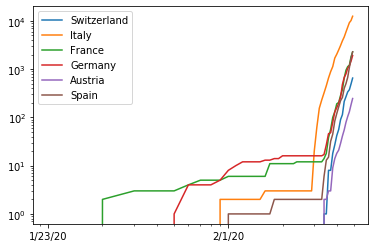

In [114]:
df2.plot(logy=True, logx=True)

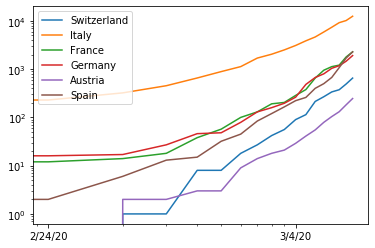

In [115]:
df2[32:].plot(logy=True, logx=True)

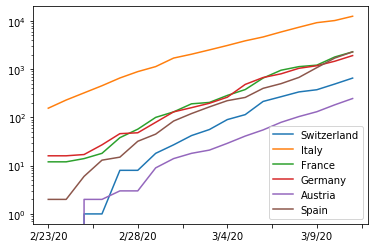

In [116]:
df2[32:].plot(logy=True)

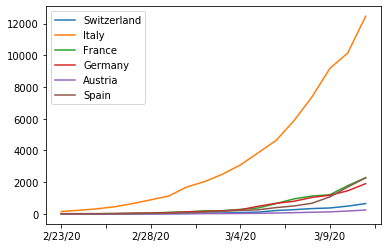

In [117]:
df2[32:].plot()

In [140]:
us = df[df["Country/Region"] == "US"].groupby(by=["Country/Region",]).sum().stack().droplevel(level=0)

In [147]:
us.head()

1/22/20    1
1/23/20    1
1/24/20    2
1/25/20    2
1/26/20    5
dtype: int64

In [162]:
df3 = pd.concat([df2, us], axis=1)

In [163]:
col = list(df3.columns)

In [164]:
col[col.index(0)] = 'US'

In [165]:
df3.columns = col

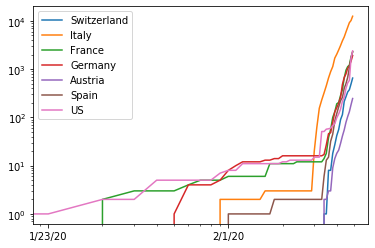

In [166]:
df3.plot(logy=True, logx=True)

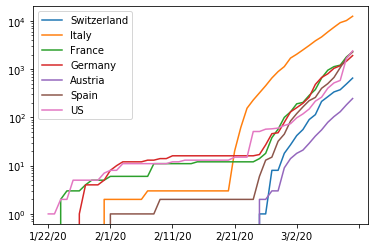

In [170]:
df3.plot(logy=True)

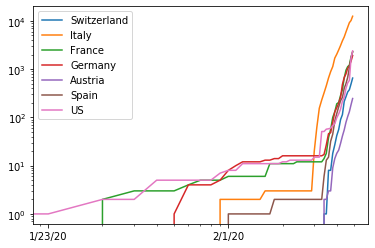

In [169]:
df3.plot(logy=True, logx=True)

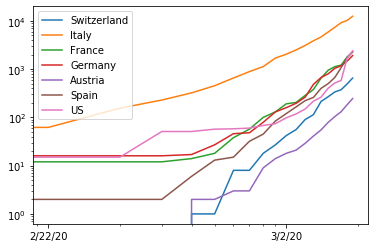

In [173]:
df3[30:].plot(logy=True, logx=True)